## Project 4: Exploring the UK's milk imports and exports

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2015:

- How much does the UK export and import and is the balance positive (more exports than imports)? 
- Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
- Which are the regular customers, i.e. which countries buy milk from the UK every month?
- Which countries does the UK both import from and export to?

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

## Getting and preparing the data

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: monthly 
- Periods: January to May of 2015
- Reporter: United Kingdom
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)



In [2]:
LOCATION = 'comtrade_milk_uk_march_may_15.csv'

The data can also be downloaded directly from Comtrade using the "View API Call" URL, modified in two ways:

- `max=500` is increased to `max=5000` to make sure all data is loaded,
- `&fmt=csv` is added at the end to obtain the data in CSV format.

On reading in the data, the commodity code has to be read as a string, to not lose the leading zero.

In [3]:
milk2 = read_csv(LOCATION)
milk2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,19314032,NaN,14497413,NaN,NaN,0
1,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,562973,NaN,657685,NaN,NaN,0
2,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,32,NaN,232,NaN,NaN,0
3,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,1973804,NaN,2459139,NaN,NaN,0
4,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,849151,NaN,1114603,NaN,NaN,0


The data only covers the first five months of 2015. Most columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. The commodity code is transformed into a short but descriptive text and only the relevant columns are selected.

In [4]:
milk2.dropna(axis=1, inplace=True)

In [5]:
milk2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),Flag
0,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,0,World,401,Milk and cream; not concentrated nor containin...,19314032,14497413,0
1,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,56,Belgium,401,Milk and cream; not concentrated nor containin...,562973,657685,0
2,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,203,Czech Rep.,401,Milk and cream; not concentrated nor containin...,32,232,0
3,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,208,Denmark,401,Milk and cream; not concentrated nor containin...,1973804,2459139,0
4,HS,2015,201505,May 2015,4,0,1,Imports,826,United Kingdom,251,France,401,Milk and cream; not concentrated nor containin...,849151,1114603,0


In [7]:
new_milk_data = milk2.drop(["Classification", "Partner Code", "Period Desc.", "Year", "Reporter", "Reporter Code", "Aggregate Level", "Is Leaf Code", "Trade Flow Code", "Commodity Code", "Flag"], axis =1)
new_milk_data.head()

,Period,Trade Flow,Partner,Commodity,Netweight (kg),Trade Value (US$)
0,201505,Imports,World,Milk and cream; not concentrated nor containin...,19314032,14497413
1,201505,Imports,Belgium,Milk and cream; not concentrated nor containin...,562973,657685
2,201505,Imports,Czech Rep.,Milk and cream; not concentrated nor containin...,32,232
3,201505,Imports,Denmark,Milk and cream; not concentrated nor containin...,1973804,2459139
4,201505,Imports,France,Milk and cream; not concentrated nor containin...,849151,1114603


In [9]:
from sklearn.preprocessing import LabelEncoder

new_milk_data['Commodity'] = LabelEncoder().fit_transform(milk2['Commodity'])
new_milk_data['Trade Flow'] = LabelEncoder().fit_transform(milk2['Trade Flow'])

new_milk_data.head()

,Period,Trade Flow,Partner,Commodity,Netweight (kg),Trade Value (US$)
0,201505,1,World,1,19314032,14497413
1,201505,1,Belgium,1,562973,657685
2,201505,1,Czech Rep.,1,32,232
3,201505,1,Denmark,1,1973804,2459139
4,201505,1,France,1,849151,1114603


The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [10]:


new_milk_data1 = new_milk_data[new_milk_data['Partner'] != 'World']

new_milk_data1

,Period,Trade Flow,Partner,Commodity,Netweight (kg),Trade Value (US$)
1,201505,1,Belgium,1,562973,657685
2,201505,1,Czech Rep.,1,32,232
3,201505,1,Denmark,1,1973804,2459139
4,201505,1,France,1,849151,1114603
5,201505,1,Germany,1,1170058,645384
...,...,...,...,...,...,...
638,201503,0,United Arab Emirates,0,43092,225175
639,201503,0,Burkina Faso,0,125000,463591
640,201503,0,Uruguay,0,16000,45991
641,201503,0,Yemen,0,290000,676375


## Total trade flow

To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?',
the dataframe is split into two groups: exports from the UK and imports into the UK. The  trade values within each group are summed up to get the total trading.

In [11]:
grouped = new_milk_data1.groupby(['Trade Flow'])
grouped['Trade Value (US$)'].aggregate(sum)

Trade Flow
0    267525521
1    160451147
Name: Trade Value (US$), dtype: int64

where export is espressed as 0 and import as 1
we can therefore say that theres a trade surplus of over 100 million dollars.

## Main trade partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [12]:
imports = new_milk_data1[new_milk_data1['Trade Flow'] == 1]
grouped2 = imports.groupby(['Partner'])
print('The UK imports from', len(grouped2), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped2['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()





The UK imports from 22 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        47729692
France         28484766
Germany        22954774
Netherlands    18415687
Belgium        14303482
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

<AxesSubplot:ylabel='Partner'>

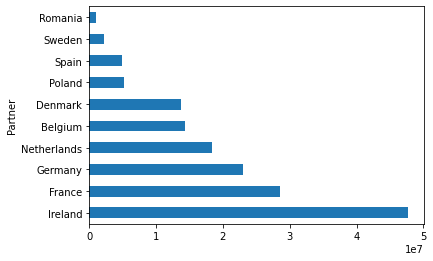

In [14]:
totalImports.head(10).plot(kind='barh')

In [13]:
exports = new_milk_data1[new_milk_data1['Trade Flow'] == 0]
grouped3 = exports.groupby(['Partner'])
print('The UK exports to', len(grouped3), 'countries.')
print('The 5 biggest importers from the UK are:')
totalExports = grouped3['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False)
totalExports.head()

The UK exports to 107 countries.
The 5 biggest importers from the UK are:


Partner
Ireland                 128205584
Netherlands              19893485
China                    14111163
Germany                  11393222
China, Hong Kong SAR      9482458
Name: Trade Value (US$), dtype: int64

## Regular importers

Given that there are two commodities, the third question, 'Which are the regular customers, i.e. which countries buy milk from the UK every month?', is meant in the sense that a regular customer imports both commodities every month. This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [15]:
def buysEveryMonth(group):
    return len(group) == 10

grouped4 = exports.groupby(['Partner'])
regular = grouped4.filter(buysEveryMonth)
print(regular)
regular[(regular['Period'] == 201501) & (regular['Commodity'] == 1)]


     Period  Trade Flow               Partner  Commodity  Netweight (kg)  \
35   201505           0               Belgium          1          894996   
37   201505           0                 China          1          651692   
38   201505           0                Cyprus          1             240   
40   201505           0               Denmark          1              14   
44   201505           0                France          1          933032   
..      ...         ...                   ...        ...             ...   
626  201503           0                Poland          0             793   
627  201503           0              Portugal          0             820   
635  201503           0                 Spain          0           47089   
636  201503           0                Sweden          0            1173   
638  201503           0  United Arab Emirates          0           43092   

     Trade Value (US$)  
35             1532294  
37              636365  
38          

,Period,Trade Flow,Partner,Commodity,Netweight (kg),Trade Value (US$)
75,201501,0,Belgium,1,597469,996031
79,201501,0,China,1,447823,1022524
80,201501,0,Cyprus,1,4289,4029
81,201501,0,Denmark,1,3381,2943
84,201501,0,France,1,1089710,1761611
85,201501,0,Germany,1,89727,281709
87,201501,0,"China, Hong Kong SAR",1,44903,224000
88,201501,0,Hungary,1,1266,2831
89,201501,0,Ireland,1,53408313,20904409
90,201501,0,Italy,1,11674,17921


In [16]:
regular['Trade Value (US$)'].sum() / exports['Trade Value (US$)'].sum()

0.7606021669984898

Just over 76% of the total UK exports are due to these regular customers.

## Bi-directional trade

To address the fourth question, 
'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country. 

In [17]:

countries = pivot_table(new_milk_data1, index=['Partner'], columns=['Trade Flow'], 
                        values='Trade Value (US$)', aggfunc=sum)
countries.head()

Trade Flow,0,1
Partner,,
Algeria,8087885.0,NaN
Angola,2416129.0,NaN
Antigua and Barbuda,22218.0,NaN
"Areas, nes",51205.0,NaN
Australia,81644.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [18]:
countries1 = countries.dropna()
countries1

Trade Flow,0,1
Partner,,
Austria,56160.0,780.0
Belgium,7215960.0,14303482.0
Czech Rep.,2590.0,487196.0
Denmark,337622.0,13681571.0
France,9394028.0,28484766.0
Germany,11393222.0,22954774.0
Hungary,71331.0,4762.0
Ireland,128205584.0,47729692.0
Italy,173015.0,320150.0


In [19]:
print('The UK exports to', len(countries1), 'countries.')

The UK exports to 21 countries.


## Conclusions

The milk and cream trade of the UK from March to May 2015 was analysed in terms of which countries the UK mostly depends on for income (exports) and goods (imports). Over the period, the UK had a trade surplus of over 100 million US dollars.

Ireland is the main partner, but it imported from the UK almost the triple in value than it exported to the UK. 

The UK exported to over 107 countries during the period, but only imported from 22 countries, the main ones (top five by trade value) being geographically close. China and Hong Kong are the main importers that are not also main exporters. 

Just over 76% of the total UK exports are due to these regular customers.

The UK is heavily dependent on its regular customers, the 17 countries that buy all types of milk and cream every month. They contribute three quarters of the total export value.

The UK has bi-directional trade (i.e. both exports and imports) with 21 countries, although for some the trade value (in US dollars) is suspiciously low, which raises questions about the data's accuracy.

